In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.shape

(400, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
data.mean()
#arithmetic average-MEAN

Serial No.           200.500000
GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

In [10]:
data['GRE Score'].mode()
#MODE- There are two values with the same frequency- BIMODAL, in this case

0    312
1    324
dtype: int64

In [11]:
data.median()
#In his case, Mean & Median seems to be more or less similar & extreme skewness is therefore not a problem

Serial No.           200.50
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64

In [12]:
data.quantile(q=0.25)
#a quarter of people, 100 out of 400 people (say), have GRE Score less than 300

Serial No.           100.75
GRE Score            308.00
TOEFL Score          103.00
University Rating      2.00
SOP                    2.50
LOR                    3.00
CGPA                   8.17
Research               0.00
Chance of Admit        0.64
Name: 0.25, dtype: float64

In [13]:
data.quantile(q=0.75)

Serial No.           300.2500
GRE Score            325.0000
TOEFL Score          112.0000
University Rating      4.0000
SOP                    4.0000
LOR                    4.0000
CGPA                   9.0625
Research               1.0000
Chance of Admit        0.8300
Name: 0.75, dtype: float64

In [14]:
data.describe()
#provides Five Number Summary

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


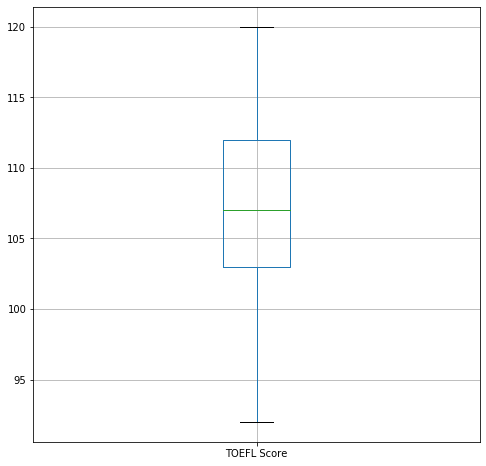

In [15]:
data.boxplot(column='TOEFL Score',return_type='axes',figsize=(8,8));

In [16]:
#IQR
data.quantile(q=0.75)-data.quantile(q=0.25)

Serial No.           199.5000
GRE Score             17.0000
TOEFL Score            9.0000
University Rating      2.0000
SOP                    1.5000
LOR                    1.0000
CGPA                   0.8925
Research               1.0000
Chance of Admit        0.1900
dtype: float64

In [17]:
data.var()

Serial No.           13366.666667
GRE Score              131.644555
TOEFL Score             36.838997
University Rating        1.308114
SOP                      1.013784
LOR                      0.807262
CGPA                     0.355594
Research                 0.248365
Chance of Admit          0.020337
dtype: float64

In [18]:
data.std()

Serial No.           115.614301
GRE Score             11.473646
TOEFL Score            6.069514
University Rating      1.143728
SOP                    1.006869
LOR                    0.898478
CGPA                   0.596317
Research               0.498362
Chance of Admit        0.142609
dtype: float64

In [19]:
data.cov()
#let us take GRE Score & TOEFL Score, there is a positive covariance coeff and it is 58.22
#considering Univ Rating & GRE Score, there is again a positive covariance coeff and it is 8.78
#implying there is change in the scale of number
#so we therefore consider correlation coeff

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,13366.666667,-129.369674,-103.807018,-22.472431,-19.432331,-9.164160,-3.144373,-3.637845,0.698020
GRE Score,-129.369674,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,3.318690,1.313271
TOEFL Score,-103.807018,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,1.481729,0.685179
University Rating,-22.472431,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.255232,0.116009
SOP,-19.432331,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.222807,0.097028
LOR,-9.164160,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.177701,0.085834
CGPA,-3.144373,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.155026,0.074265
Research,-3.637845,3.318690,1.481729,0.255232,0.222807,0.177701,0.155026,0.248365,0.039317
Chance of Admit,0.698020,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.039317,0.020337


In [21]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


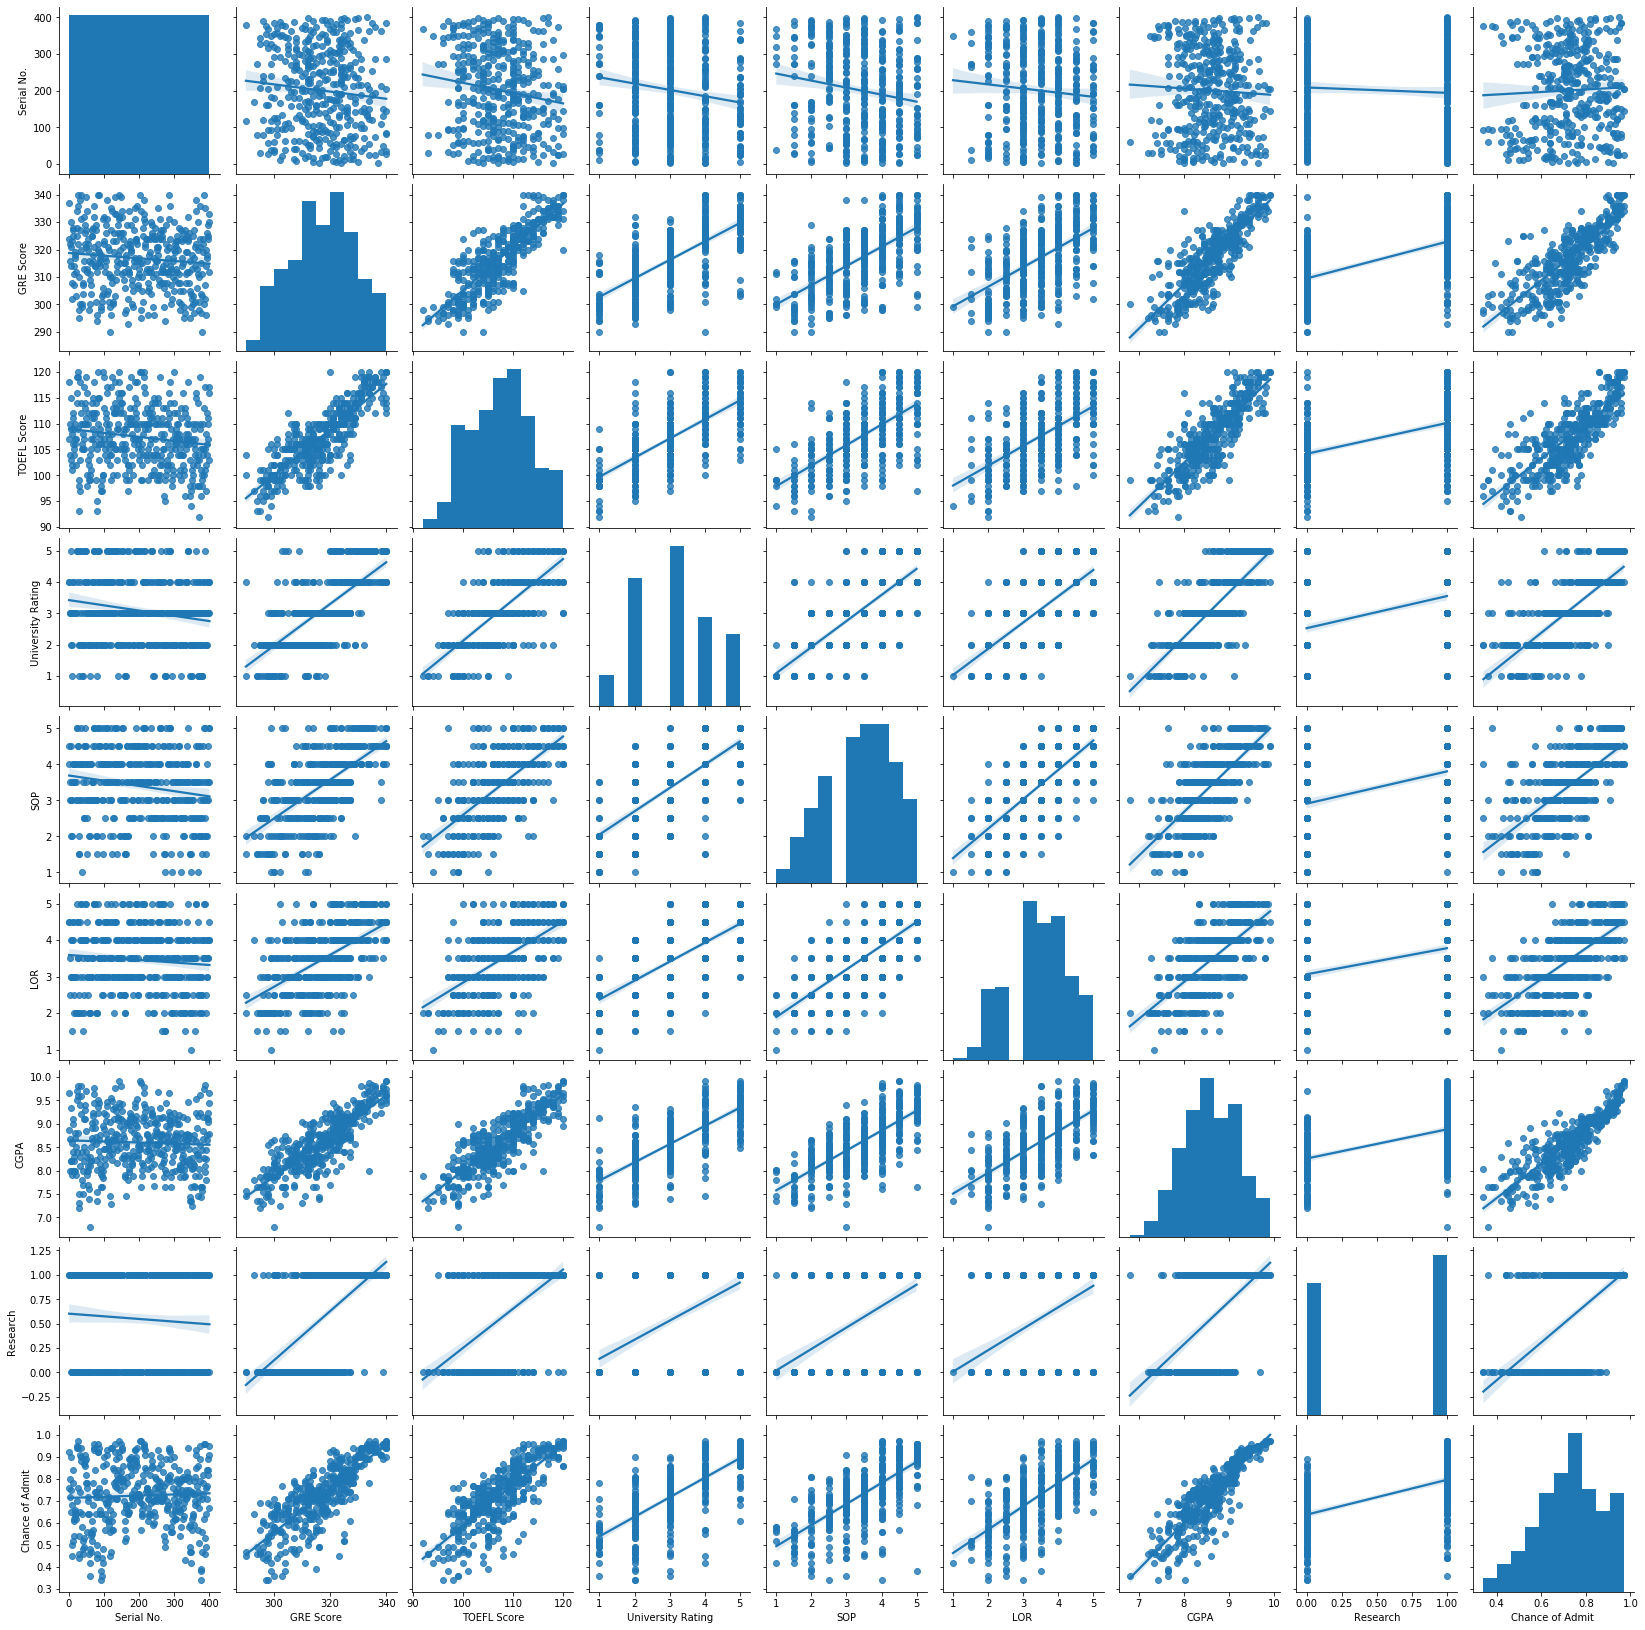

In [23]:
import seaborn as sns

sns.pairplot(data,kind='reg')
plt.show()